# 0. Load  data and transform

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from scripts.load_data import load_data
from scripts.plot_collection_lag_distribution import plot_collection_lag_distribution
folder_path = '/Users/CUDAN/Documents/GitHub/data_analysis_portfolio/data' #uni macbook
museums_data, museum_names = load_data(folder_path, filter_data=False)

/Users/CUDAN/Documents/GitHub/data_analysis_portfolio/scripts/load_data.py:18: DtypeWarning: Columns (5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame


In [2]:
collection_lag = []
for df in museums_data:
    # Calculate collection lag
    df['Collection_lag'] = pd.NA
    df['Year_acquisition'] = pd.to_numeric(df['Year_acquisition'], errors='coerce')
    df['Date_creation_year'] = pd.to_numeric(df['Date_creation_year'], errors='coerce')
    df['Collection_lag'] = df['Year_acquisition'] - df['Date_creation_year']
    
    # Group and count, specifying which column to count
    new_df = (df.groupby('Collection_lag')
              .size()  # Count occurrences
              .reset_index(name='count'))  # Reset index and name the count column
    
    collection_lag.append(new_df)

In [6]:
museums_data[0].columns

Index(['Artist', 'Title', 'Medium', 'Medium_classified',
       'Acquisition_classified', 'Year_acquisition', 'Gender_classified',
       'Artist_birth_year', 'Artist_death_year', 'Country_calculated',
       'Date_creation_year', 'Collection_lag'],
      dtype='object')

In [14]:
collection_lag[0].head()

,Collection_lag,count
0,-38.0,1
1,-16.0,1
2,-5.0,1
3,-4.0,1
4,-3.0,1


# 1. Plot collection lag distributions

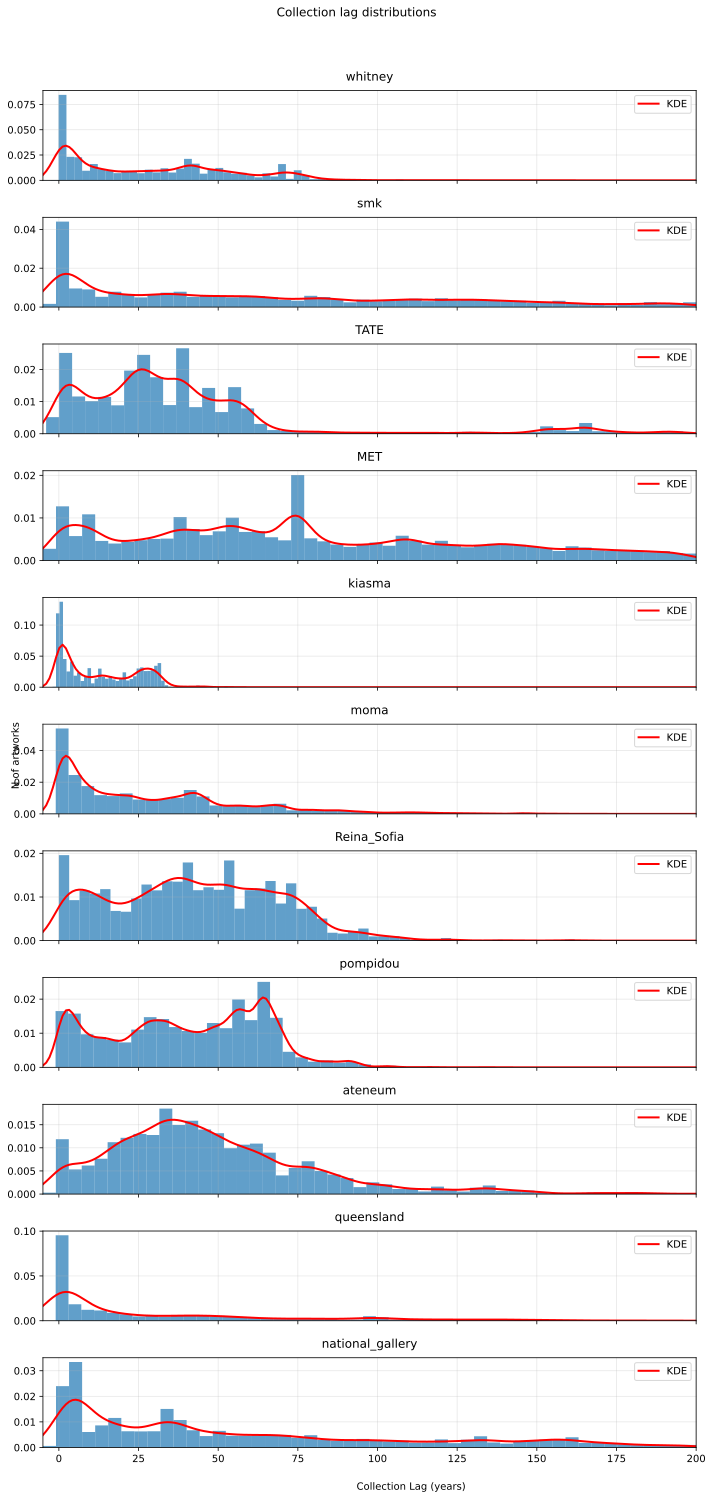

In [3]:
plot_collection_lag_distribution(collection_lag, museum_names)

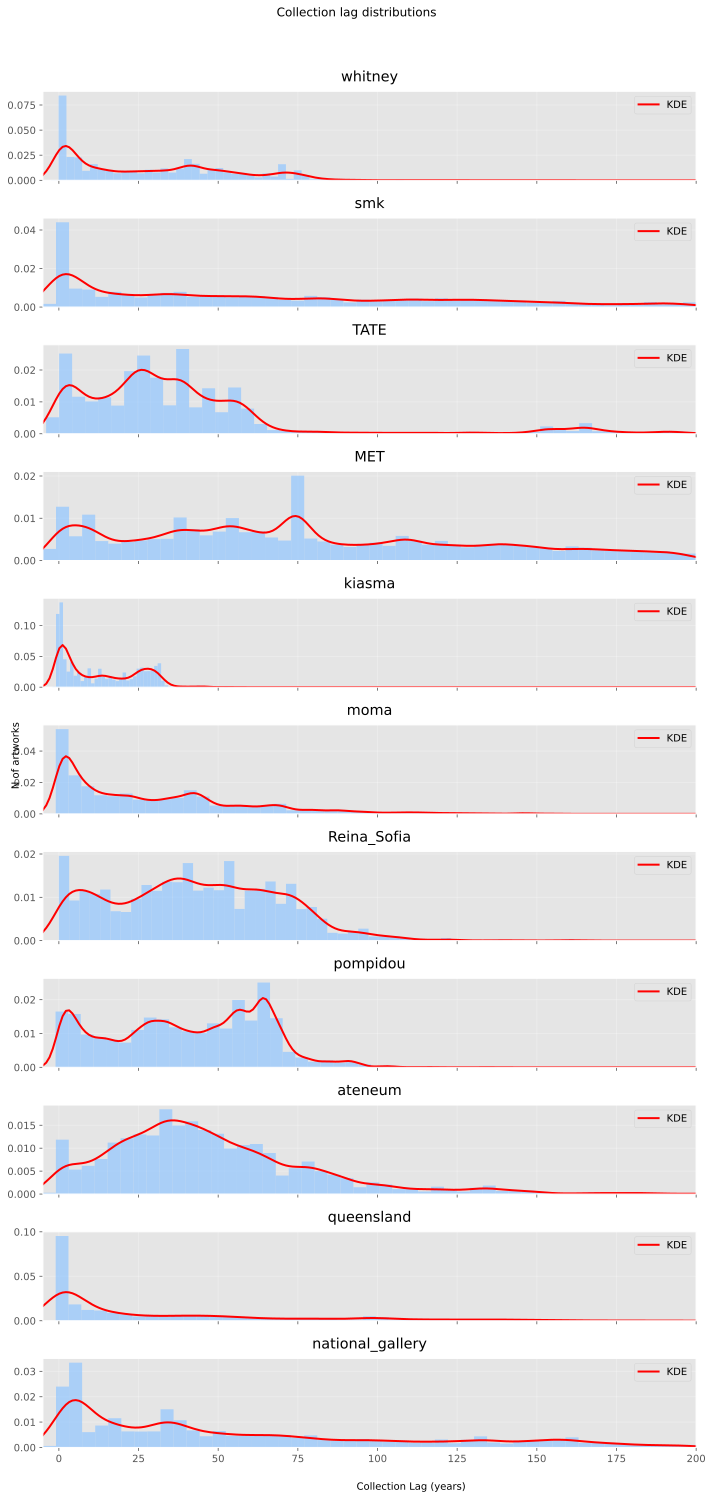

In [13]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20), sharex=True)
fig.suptitle('Collection lag distributions')

for i, (df, museum) in enumerate(zip(collection_lag, museum_names)):
    # Filter data between -5 and 200
    filtered_df = df[(df['Collection_lag'] >= -5) & (df['Collection_lag'] <= 200)]
    
    # Create histogram
    axs[i].hist(filtered_df['Collection_lag'],
                weights=filtered_df['count'],
                density=True,
                bins=50,
                alpha=0.7)
    
    # Calculate KDE
    from scipy import stats
    kde_xs = np.linspace(-5, 200, 200)
    kde = stats.gaussian_kde(np.repeat(filtered_df['Collection_lag'], filtered_df['count'].astype(int)))
    kde_density = kde(kde_xs)
    
    # Plot KDE curve
    axs[i].plot(kde_xs, kde_density, 'r-', lw=2, label='KDE')
    
    # Add title for each subplot using museum name
    axs[i].set_title(museum, pad=10)
    
    # Optional: Add grid for better readability
    axs[i].grid(True, alpha=0.3)
    
    # Add legend
    axs[i].legend()

# Set x-axis limits
plt.xlim(-5, 200)

# Adjust layout to prevent overlapping
plt.tight_layout()
fig.suptitle('Collection lag distributions', y=1.02)

# Add common x-label
fig.text(0.5, -0.01, 'Collection Lag (years)')

# Add common y-label
fig.text(0.02, 0.5, 'N of artworks', va='center', rotation='vertical')

plt.style.use('seaborn-v0_8-pastel')